# 中点滤波器

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [11]:
def mid_point_filter(src):
    rows,cols = src.shape[0],src.shape[1]
    dst = np.zeros(src.shape,dtype=np.float64)
    gray_val = 0
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            rgb = np.array([src[i,j],src[i-1,j-1],src[i,j-1],
                    src[i+1,j-1],src[i-1,j],src[i+1,j],
                    src[i-1,j+1],src[i,j+1],src[i+1,j+1]],dtype=np.float64)
#             print(rgb.shape)
            gray = 0.299 * rgb[:,0] + 0.587 * rgb[:,1] + 0.114 * rgb[:,2]
            r = rgb[:,0]
            g = rgb[:,1]
            b = rgb[:,2]
            tr,tg,tb = 0.0,0.0,0.0
            trm,rgm,tbm = 0.0,0.0,0.0
            gray_val = 0
            for n in range(9):
                if gray_val < gray[n]:
                    gray_val = gray[n]
                    tr = r[n]
                    tg = g[n]
                    tb = b[n]
            gmax = 0
            for n in range(9):
                if gmax < gray[n]:
                    gmax = gray[n]
                    trm = r[n]
                    tgm = g[n]
                    tbm = b[n]
    
            dst[i,j,0] = (tr + trm) / 2
            dst[i,j,1] = (tg + tgm) / 2
            dst[i,j,2] = (tb + tbm) / 2
            
    return cv2.convertScaleAbs(dst)

In [12]:
dst = mid_point_filter(src)

Text(0.5,1,'DST')

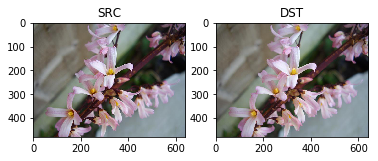

In [13]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('DST')

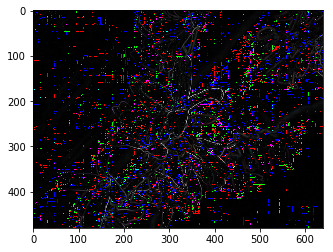

In [14]:
plt.imshow(cv2.convertScaleAbs(dst - src))

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45308381